# IMPORT LIBRARY


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Standard normal CDF

Write a program in Python that asks a user for a number `x`, and then outputs the value of the cumulative distribution function of the standard normal distribution at `x`.

## Example

`Enter x: 0.3
The value of the standard normal CDF at 0.3 is 0.6179114221889526`

**Hint:** You'll want to use the `input(...)` and `print(...)` functions for this. Recall that `input(...)` returns a string, which must be converted to a floating point number using `float(...)`. If we do `from scipy.stats import norm`, then the cumulative distribution function of the standard normal distribution can be accessed as `norm.cdf(...)`.


In [2]:
def CDF_UI():
    x = float(input("Enter x:"))
    print(f'The value of the standard normal CDF at {x} is {norm.cdf(x)}')

In [4]:
CDF_UI()

The value of the standard normal CDF at 0.3 is 0.6179114221889526


# Black/Scholes formula in Python

The Black/Scholes price of a European call option expiring at time $T$ with strike price $K$ is

$$
C(S,t)=SN(d_1)−Ke^{−r(T−t)}N(d_2)
$$

where $S$ is the current price of the underlying asset, $t$ the current time and $r$ the continuously compounded riskfree interest rate. $N(d)$ denotes the cumulative distribution function of the standard normal distribution, and

$$

d_1 = \frac{\ln\frac{S}K+(r+\frac12\sigma^2)(T−t)}{\sigma\sqrt{T-t}}\\
d_2 = d_1−\sigma\sqrt{T-t}


$$

where the $\sigma$ denotes the volatility of the underlying asset.

Using the scaffold provided, write a Python program which prompts the user for the required inputs, and prints the Black/Scholes price of the option.

## Example

`Enter the underlying stock price: 100
Enter the strike price: 100
Enter the volatility: 0.3
Enter continuously compounded interest rate: 0.02
Enter the time to maturity: 2.5
The call option price is: 20.82854108910454`


In [11]:
import numpy as np
from scipy.stats import norm

stock = float(input('Enter the underlying stock price: '))
strike = float(input('Enter the strike price: '))
sigma = float(input('Enter the volatility: '))
interest = float(input('Enter continuously compounded interest rate: '))
maturity = float(input('Enter the time to maturity: '))

d1 = (np.log(stock/strike)+(interest+(sigma**2)/2)*maturity)/(sigma*np.sqrt(maturity))
d2 = d1-sigma*np.sqrt(maturity)
BlackScholes = stock*norm.cdf(d1) - strike * np.exp(-interest*maturity)*norm.cdf(d2)

print('The call option price is: ' + str(BlackScholes))

The call option price is: 20.82854108910454


# Black Scholes formula as a Python function

As in the previous task, consider the Black/Scholes price of a European call option expiring at time $T$ with strike price $K$. Similarly, the price of a European put option expiring at time $T$ with strike price $K$ is

$$
P(S,t)=Ke^{−r(T−t)}N(−d_2)−SN(−d_1)
$$

Using the scaffold provided, write a Python function which calculates the Black/Scholes price of the option, where the function takes six arguments (in this order): $S$, $K$, $\sigma$, $r$, $T$ and a 1 for a call or -1 for a put.

## Example:

`Enter the underlying stock price: 100
Enter the strike price: 100
Enter the volatility: 0.3
Enter continuously compounded interest rate: 0.05
Enter the time to maturity: 2
Enter 1 for call or -1 for put option: 1
The option price is: 21.193735255280203`

## Another example (a put option):

`Enter the underlying stock price: 100
Enter the strike price: 100
Enter the volatility: 0.3
Enter continuously compounded interest rate: 0.05
Enter the time to maturity: 2
Enter 1 for call or -1 for put option: -1
The option price is: 11.677477058876157`


In [15]:
def BlackScholes(S,K,sgm,r,T,callput):
    d1 = (np.log(S/K)+(r+(sgm**2)/2)*T)/(sgm*np.sqrt(T))
    d2 = d1-sgm*np.sqrt(T)
    if callput==1:
        return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    else:
        return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    
stock = float(input('Enter the underlying stock price: '))
strike = float(input('Enter the strike price: '))
sigma = float(input('Enter the volatility: '))
interest = float(input('Enter continuously compounded interest rate: '))
maturity = float(input('Enter the time to maturity: '))
callput = int(input('Enter 1 for call or -1 for put option: '))
print('The option price is: ')
print(BlackScholes(stock,strike,sigma,interest,maturity,callput))

The option price is: 
21.193735255280203


# Implied volatility

To calculate the price of a European option, we need to know whether it is a call or a put, the strike $K$, and its time to expiry - these are properties specified in the option contract. Furthermore, we need to know the current price of the underlying asset $(S)$ and the interest rate $r$ - these are things which can arguably be observed in the market. Lastly, we need the volatility $\sigma$ - this is not directly observable in the market. Although it can be statistically estimated, when prices for actively traded options are available in the market, the preferred method to obtain sigma is to **imply** it from those market prices. This is the <B><I>implied volatility</I></B>, i.e. the $\sigma$ which needs to be inserted into the Black/Scholes formula so that, in combination with the observed values for the other input variables, it returns the observed market price of the option.

Implied volatility cannot be obtained by algebraically solving the Black/Scholes formula for volatility - this is not analytically possible. Therefore, Black/Scholes implied volatility must be obtained numerically using a _root search._ The SciPy package provides a root search routine for Python, which for a user-defined function finds the function argument which results in a zero function value. For example, consider the function

$$
f(x)=ax+b
$$

We define this as a Python function and determine its root (for a specific choice of $a$ and $b$) by calling the SciPy function `root_scalar`:


In [17]:
from scipy import optimize
def f(x,a,b):
    return a*x+b
sol = optimize.root_scalar(f, bracket=[-1000,1000], args=(2,-5))
print(sol.root)

2.5


Note that as well as $f$, two named arguments are passed to `root_scalar`: `bracket` specifies a lower and upper bound in the search for the root, and `args` specifies the other arguments ($a$ and $b$) of $f$. Feel free to run and play with the above code (for example by modifying `args`, or even the function $f$).

## Task

Using the scaffold provided, write a Python function which calculates the Black/Scholes implied volatility of an option, where the function takes six arguments (in this order): $S$, $K$, $r$, $T$, a 1 for a call or -1 for a put, and the option price. Note that you will need to define additional functions in order to conduct the root search.

### Example output

`Enter the underlying stock price: 100 
Enter the strike price: 100 
Enter continuously compounded interest rate: 0.05 
Enter the time to maturity: 2 
Enter 1 for call or -1 for put option: 1 
Enter the option price: 22.7251160722058 
The implied volatility is: 0.3300000000000001`


In [19]:
def BlackScholesImpVol(S,K,r,T,callput,price):
    def Vol_Searcher(sgm, S,K,r,T,callput,price):
        return price - BlackScholes(S,K,sgm,r,T,callput)
    return optimize.root_scalar(Vol_Searcher, bracket=[-1000,1000], args=(S,K,r,T,callput,price)).root

stock = float(input('Enter the underlying stock price: '))
strike = float(input('Enter the strike price: '))
interest = float(input('Enter continuously compounded interest rate: '))
maturity = float(input('Enter the time to maturity: '))
callput = int(input('Enter 1 for call or -1 for put option: '))
price = float(input('Enter the option price: '))
print('The implied volatility is: ')
print(BlackScholesImpVol(stock,strike,interest,maturity,callput,price))

The implied volatility is: 
0.32999999999999985


# Plotting an implied volatility smile from option price data

Consider the data in the file `TSLA.xlsx`, which contains data on options on Tesla, Inc. (TSLA) traded on CBOE on 8 March 2023. The price of TSLA on that day was USD 182.00. The options are American style, but TSLA isn't paying any dividends, so call options can be priced as if they were European.

## Task

Using the middle of the bid/ask spread, calculate the Black/Scholes implied volatilities of all call options expiring on 15 March 2024, which had a nonzero trading volume on CBOE on 8 March 2023. You may assume that the riskfree rate for this maturity was 5.751038% continuously compounded, using an ACT/365 daycount convention (i.e., the time to maturity in years is given by the number of days between 8 March 2023 and 15 March 2024, divided by 365). Plot these implied volatilities.


C:\Users\1tran\AppData\Local\Temp\ipykernel_3096\1388625376.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6793394017954807' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  vol_implied.iloc[i,1] = BlackScholesImpVol(S,new_df.iloc[i, 8],r,dt,1,np.average([new_df.iloc[i, 4], new_df.iloc[i, 5]]))


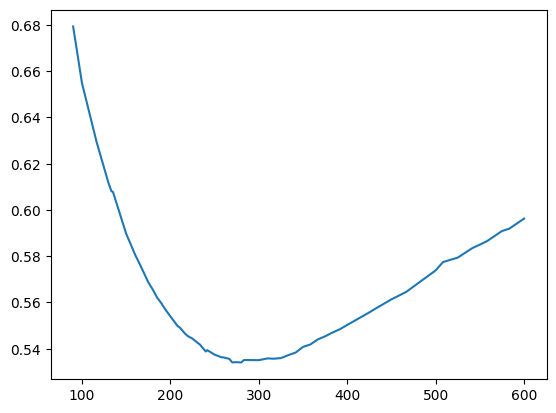

In [36]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

df = pd.read_excel('TSLA.xlsx')
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], format='%a %b %d %Y')
S = 182
r = 0.05751038
T = datetime.date(2024,3,15)
t = datetime.date(2023,3,8)
dt = (T-t).days/365
new_df = df[df['Expiration Date'].dt.date==T].reset_index(drop=True)
new_df = new_df[new_df['Volume']!=0].reset_index(drop=True)
vol_implied = pd.DataFrame({
    "Option ID": new_df['Calls'],
    "Volatilities": [0]*len(new_df),
    "Strike": new_df['Strike']
})
for i in range(len(vol_implied)):
    vol_implied.iloc[i,1] = BlackScholesImpVol(S,new_df.iloc[i, 8],r,dt,1,np.average([new_df.iloc[i, 4], new_df.iloc[i, 5]]))
vol_implied.sort_values(by="Strike", ascending=True, inplace=True)
plt.plot(list(new_df['Strike']), list(vol_implied['Volatilities']))
plt.show()

# Binomial option pricing model - American put option

Using the scaffold provided, write a Python function `BinomialAmericanPut()` which calculates the price of an American put option in the binomial model. The function should take six arguments (in this order): $S$, $K$, $u$, $d$, $R$, $n$, where $S$ is the initial stock price, $K$ is the strike price, $u$ is the "up" factor, $d$ is the "down" factor, $R$ is the accummulation factor, and $n$ is the number of time steps until expiry of the option. The price must be calculated by iterating step by step backwards through the binomial lattice, as illustrated in the spreadsheet `Binomial.xlsx` created in the lecture (and available on the Canvas site).

## Example:

This example corresponds to the one given on Slide 42 of Lecture 1b:

`Enter the underlying stock price: 120
Enter the strike price: 95
Enter the up factor: 1.2
Enter the down factor: 0.8
Enter the accumulation factor: 1.1
Enter the number of time steps: 3
The option price is: 1.1401202103681396`


In [61]:
def BinomialAmericanPut(S, K, u, d, R, N):
    p_u = (R-d)/(u-d)
    p_d = 1 - p_u
    prices = [[max([K-S,0])]]
    for i in range(1,N+1):
        temp_price = []
        for j in range(i+1):
            temp_price.append(max([K-S*(u**(i-j))*(d**(j)),0]))
        prices.append(temp_price)
    for i in range(N,0,-1):
        for j in range(len(prices[i-1])):
            prices[i-1][j]=max([prices[i-1][j],(p_u*prices[i][j]+p_d*prices[i][j+1])/R])
    return prices[0][0]
    

stock = float(input('Enter the underlying stock price: '))
strike = float(input('Enter the strike price: '))
u = float(input('Enter the up factor: '))
d = float(input('Enter the down factor: '))
R = float(input('Enter the accumulation factor: '))
N = int(input('Enter the number of time steps: '))
print('The option price is: ')
print(BinomialAmericanPut(stock,strike,u,d,R,N))

The option price is: 
1.1401202103681385
